In [1]:
%run StatTest2_WithSimulation_Setup.ipynb

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [2]:
data2014 = pd.read_csv("Our_Dataset/2014dataset.csv")
data2015 = pd.read_csv("Our_Dataset/2015dataset.csv")
data2016 = pd.read_csv("Our_Dataset/2016dataset.csv")
data2017 = pd.read_csv("Our_Dataset/2017dataset.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,52,323,649,882,932,1092,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,57,204,341,376,377,396,430,431,928,944,1006,1013,1151,1160,1169,1179,1411) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,17,163,355,406,702,835,847,1083,1156,1183,1185,1200) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create the labels.
# By index:
# label 2 is transfers
# label 3 is premiums
# label 4 is costs
# label 5 is member months
# label 6 is reinsurance (individual group only)

ind_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                  "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                  "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "STATE", "REINSURANCE PAYMENT AMOUNT (OR NOT ELIGIBLE)"] # no more reinsurance as of 2017
ind_labels_15 = [label.replace('15', '16') for label in ind_labels_14]
ind_labels_16 = [label.replace('15', '17') for label in ind_labels_14]
ind_labels_17 = [label.replace('15', '18') for label in ind_labels_14][:-1]

sg_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                 "HHS RISK ADJUSTMENT TRANSFERS AMOUNT (SMALL GROUP MARKET)",
                  "1.1Directpremiumwritten7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "2.16Totalincurredclaims7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15", "STATE"]
sg_labels_15 = [label.replace('15', '16') for label in sg_labels_14]
sg_labels_16 = [label.replace('15', '17') for label in sg_labels_14]
sg_labels_17 = [label.replace('15', '18') for label in sg_labels_14]

In [4]:
# Filter the data to include only the fields we want

ind_data_14 = data2014[ind_labels_14].dropna()
ind_data_15 = data2015[ind_labels_15].dropna()
ind_data_16 = data2016[ind_labels_16].dropna()
ind_data_17 = data2017[ind_labels_17].dropna()
sg_data_14 = data2014[sg_labels_14].dropna()
sg_data_15 = data2015[sg_labels_15].dropna()
sg_data_16 = data2016[sg_labels_16].dropna()
sg_data_17 = data2017[sg_labels_17].dropna()

In [5]:
# Drop companies with <2000 MM
ind_data_14 = ind_data_14.where(ind_data_14[ind_labels_14[5]] > 2000).dropna()
ind_data_15 = ind_data_15.where(ind_data_15[ind_labels_15[5]] > 2000).dropna()
ind_data_16 = ind_data_16.where(ind_data_16[ind_labels_16[5]] > 2000).dropna()
ind_data_17 = ind_data_17.where(ind_data_17[ind_labels_17[5]] > 2000).dropna()
sg_data_14 = sg_data_14.where(sg_data_14[sg_labels_14[5]] > 2000).dropna()
sg_data_15 = sg_data_15.where(sg_data_15[sg_labels_15[5]] > 2000).dropna()
sg_data_16 = sg_data_16.where(sg_data_16[sg_labels_16[5]] > 2000).dropna()
sg_data_17 = sg_data_17.where(sg_data_17[sg_labels_17[5]] > 2000).dropna()

In [6]:
# Calculate transfers, premiums, costs, and reinsurance (if individual group) per member month
def calculate_pmm(df, df_labels, group):
    df["MM"] = df[df_labels[5]]
    df["Transfers"] = df[df_labels[2]]
    df["TotalCosts"] = abs(df[df_labels[4]])
    df["Enrollees"] = df["MM"] / 12
    df["TransfersPerEnrollee"] = df["Transfers"] / df["Enrollees"]
    df["TransfersPerSqrtEnrollee"] = df["Transfers"] / np.sqrt(df["Enrollees"])
    df["LogEnrollees"] = np.log(df["Enrollees"])
    df["LogTransfers"] = np.log(df["Transfers"]**2 + 1)
    df["TransfersPMM"] = df[df_labels[2]] / df[df_labels[5]]
    df["PremiumsPMM"] = abs(df[df_labels[3]] / df[df_labels[5]])
    df["CostsPMM"] = abs(df[df_labels[4]] / df[df_labels[5]])
    if group == "i":
        df["ReinsurancePMM"] = df[df_labels[7]] / df[df_labels[5]]
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"] + df["ReinsurancePMM"]
        #df["PremMinusCostsPlusReinsurancePMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["ReinsurancePMM"]
    elif group == "sg":
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["PremMinusCostsPMM"] = df["PremiumsPMM"] - df["CostsPMM"]
    df["PremMinusCostsPlusTransfersPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["SicknessPMM"] = df["CostsPMM"] - df["PremiumsPMM"]
    average_sickness = np.mean(df["SicknessPMM"])
    df["ExcessSicknessPMM"] = df["SicknessPMM"] - average_sickness
    return df

ind_data_14 = calculate_pmm(ind_data_14, ind_labels_14, "i")
ind_data_15 = calculate_pmm(ind_data_15, ind_labels_15, "i")
ind_data_16 = calculate_pmm(ind_data_16, ind_labels_16, "i")
ind_data_17 = calculate_pmm(ind_data_17, ind_labels_17, "sg")
sg_data_14 = calculate_pmm(sg_data_14, sg_labels_14, "sg")
sg_data_15 = calculate_pmm(sg_data_15, sg_labels_15, "sg")
sg_data_16 = calculate_pmm(sg_data_16, sg_labels_16, "sg")
sg_data_17 = calculate_pmm(sg_data_17, sg_labels_17, "sg")

In [7]:
# Combine the dataframes by left merging

ind_data = ind_data_14.merge(ind_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(ind_data_16, on='HIOS ID', how='outer').merge(ind_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [8]:
# Do the same thing for small group

sg_data = sg_data_14.merge(sg_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(sg_data_16, on='HIOS ID', how='outer').merge(sg_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [9]:
states = ["CA", "WI", "NY"]
dfs = [sg_data_14, sg_data_15, sg_data_16, sg_data_17]

In [10]:
dfs_new = normalize_empirical_data_to_avg_2017_dollars(dfs, states)

CA 14 Ratio is 1.154
WI 14 Ratio is 1.127
NY 14 Ratio is 0.973
CA 15 Ratio is 1.117
WI 15 Ratio is 1.099
NY 15 Ratio is 0.896
CA 16 Ratio is 1.051
WI 16 Ratio is 1.053
NY 16 Ratio is 0.862
CA 17 Ratio is 1.015
WI 17 Ratio is 1.005
NY 17 Ratio is 0.782
Empirical Transfers Sum = 4001520027.257


In [11]:
for df_temp in dfs_new:
    df_temp["TransfersNormalizedPerSqrtEnrollee"] = df_temp["TransfersNormalized"] / np.sqrt(df_temp["Enrollees"])

In [12]:
#dfs_new[3][["TransfersPerSqrtEnrollee", "TransfersNormalizedPerSqrtEnrollee"]]

In [13]:
df2 = create_df2(states, dfs_new, "TransfersNormalizedPerSqrtEnrollee")


In [14]:
k = len(df2)
v = np.linspace(0, max(abs(df2)), 10000)
v = v[1:len(v)]

ratios = [ratio_list(df2, vi) for vi in v]
#print(ratios)
begin_p = 5/k
end_p = 1-begin_p
start_index = 0
end_index = 0
for index, ratio2 in enumerate(ratios):
    if ratio2 >= begin_p:
        start_index = index
        break
    
for index, ratio2 in enumerate(ratios):
    if ratio2 > end_p:
        end_index = index
        break

if end_index == 0:
    end_index = len(v) - 1
    
v = v[start_index:end_index]

ratios2 = ratios[start_index:end_index]
multiplier = [np.sqrt(2)/vi for vi in v]
#plt.plot(v, ratios2)
#plt.plot(v, multiplier)

In [15]:
y = [multiplier[i] * special.erfinv(ratio2) for i, ratio2 in enumerate(ratios2)]
#plt.plot(v, y)
#plt.title("1/beta vs. v")
beta = [1/yi for yi in y]
#plt.plot(v, beta)
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
#plt.title("beta vs. v")

In [16]:
# Finding the minimum beta
# Whenever we reject a beta, we reject all betas greater than that,
# so keep pushing beta smaller until we reach max_difference == test_statistic
# Run test for larger data sizes (combining states, years)

In [17]:
max_beta=max(beta)
max_beta = int(max_beta/100)*100

beta = 151700.000


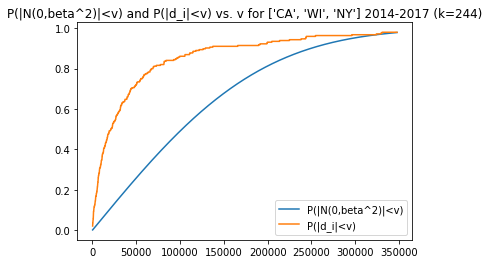

In [18]:
theoretical = [special.erf(vi/(max_beta*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v)")
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (states, len(df2)))
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
plt.legend()
print("beta = %.3f" % (max_beta))

In [19]:
beta_theoretical, Mb_index = run_test_against_theoretical(df2, max_beta, ratios2, False)

k = 244
test_stat at this k = 0.07765

At the point of maximum difference with beta = 151700:
P(|d_i|<v) = 0.7008
P(|N(0,max_beta^2)|<v) = 0.2272
Difference = 0.4737




At the point of maximum difference with beta = 141700:
P(|d_i|<v) = 0.7008
P(|N(0,max_beta^2)|<v) = 0.2427
Difference = 0.4581




At the point of maximum difference with beta = 131700:
P(|d_i|<v) = 0.7008
P(|N(0,max_beta^2)|<v) = 0.2605
Difference = 0.4403




At the point of maximum difference with beta = 121700:
P(|d_i|<v) = 0.7008
P(|N(0,max_beta^2)|<v) = 0.2810
Difference = 0.4198




At the point of maximum difference with beta = 111700:
P(|d_i|<v) = 0.7008
P(|N(0,max_beta^2)|<v) = 0.3050
Difference = 0.3959




At the point of maximum difference with beta = 101700:
P(|d_i|<v) = 0.6311
P(|N(0,max_beta^2)|<v) = 0.2611
Difference = 0.3701




At the point of maximum difference with beta = 91700:
P(|d_i|<v) = 0.6311
P(|N(0,max_beta^2)|<v) = 0.2884
Difference = 0.3428




At the point of maximum difference with beta 

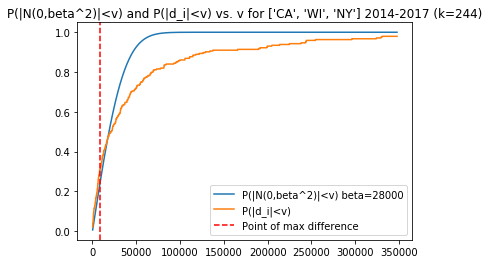

In [20]:
beta_theoretical = beta_theoretical+100

theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) beta=%d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (states, len(df2)))
plt.axvline(x=v[Mb_index], color='r', linestyle='--', label="Point of max difference")
plt.legend()
#plt.xlim(0, 50000)
#print("beta = %.3f" % (max_beta))

In [21]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)

Theoretical Test Results
Beta (=std): 28000
Number of T/sqrt(n) above 2 stds: 61
Proportion of T/sqrt(n) above 2 stds: 0.250
P value = 0.000000


In [22]:
ratios_c, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical - 10000)
ratios_c2, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical)
ratios_c3, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical + 10000)

Sum sqrt(a) = 36274.381
Sum sqrt(a) = 36274.381
Sum sqrt(a) = 36274.381


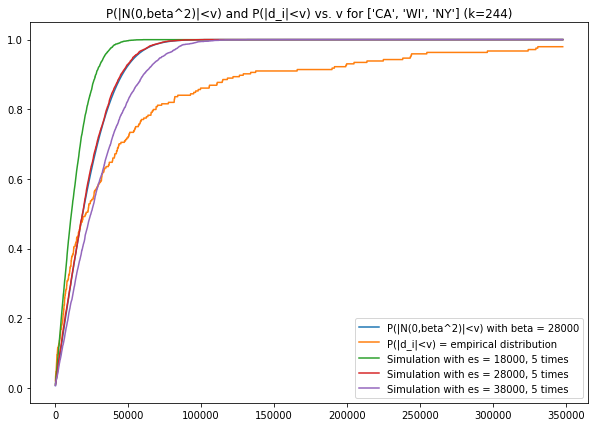

In [23]:
theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.figure(figsize=(10, 7))
plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) with beta = %d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v) = empirical distribution")
plt.plot(v, ratios_c, label="Simulation with es = %d, 5 times" % (beta_theoretical - 10000))
plt.plot(v, ratios_c2, label="Simulation with es = %d, 5 times" % (beta_theoretical))
plt.plot(v, ratios_c3, label="Simulation with es = %d, 5 times" % (beta_theoretical + 10000))
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s (k=%d)" % (states, len(df2)))
plt.legend()

In [24]:
beta_sims = list()

for i in range(5):
    beta_sim, _= run_test_against_simulation(states, dfs_new, beta_theoretical, ratios2, False)
    beta_sims.append(beta_sim)

k = 244
test_stat at this k = 0.07765

At the point of maximum difference with beta = 38000:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2358
Difference = 0.1413




At the point of maximum difference with beta = 37900:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2331
Difference = 0.1399




At the point of maximum difference with beta = 37800:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2415
Difference = 0.1355




At the point of maximum difference with beta = 37700:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1762
Difference = 0.1311




At the point of maximum difference with beta = 37600:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2380
Difference = 0.1350




At the point of maximum difference with beta = 37500:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1855
Difference = 0.1219




At the point of maximum difference with beta = 37400:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2470
Difference = 0.1301




At the point of maximum difference with beta = 3730


At the point of maximum difference with beta = 31700:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2096
Difference = 0.0978




At the point of maximum difference with beta = 31600:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2115
Difference = 0.0959




At the point of maximum difference with beta = 31500:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2038
Difference = 0.1036




At the point of maximum difference with beta = 31400:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2158
Difference = 0.0915




At the point of maximum difference with beta = 31300:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2115
Difference = 0.0959




At the point of maximum difference with beta = 31200:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2085
Difference = 0.0989




At the point of maximum difference with beta = 31100:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2085
Difference = 0.0989




At the point of maximum difference with beta = 31000:
P(|d_i|<v) = 0.2787
P(|N(0,max_beta


At the point of maximum difference with beta = 33500:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2082
Difference = 0.0992




At the point of maximum difference with beta = 33400:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2005
Difference = 0.1068




At the point of maximum difference with beta = 33300:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1962
Difference = 0.1112




At the point of maximum difference with beta = 33200:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1981
Difference = 0.1093




At the point of maximum difference with beta = 33100:
P(|d_i|<v) = 0.2787
P(|N(0,max_beta^2)|<v) = 0.1768
Difference = 0.1019




At the point of maximum difference with beta = 33000:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2650
Difference = 0.1120




At the point of maximum difference with beta = 32900:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1863
Difference = 0.1210




At the point of maximum difference with beta = 32800:
P(|d_i|<v) = 0.2787
P(|N(0,max_beta


At the point of maximum difference with beta = 35300:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1798
Difference = 0.1276




At the point of maximum difference with beta = 35200:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2615
Difference = 0.1115




At the point of maximum difference with beta = 35100:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1839
Difference = 0.1235




At the point of maximum difference with beta = 35000:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2604
Difference = 0.1167




At the point of maximum difference with beta = 34900:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1959
Difference = 0.1115




At the point of maximum difference with beta = 34800:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1978
Difference = 0.1096




At the point of maximum difference with beta = 34700:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1863
Difference = 0.1210




At the point of maximum difference with beta = 34600:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta


At the point of maximum difference with beta = 37500:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2503
Difference = 0.1268




At the point of maximum difference with beta = 37400:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2363
Difference = 0.1407




At the point of maximum difference with beta = 37300:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2541
Difference = 0.1230




At the point of maximum difference with beta = 37200:
P(|d_i|<v) = 0.4057
P(|N(0,max_beta^2)|<v) = 0.2732
Difference = 0.1325




At the point of maximum difference with beta = 37100:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2486
Difference = 0.1284




At the point of maximum difference with beta = 37000:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1768
Difference = 0.1306




At the point of maximum difference with beta = 36900:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1855
Difference = 0.1219




At the point of maximum difference with beta = 36800:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta


At the point of maximum difference with beta = 31100:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2270
Difference = 0.0803




At the point of maximum difference with beta = 31000:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2137
Difference = 0.0937




At the point of maximum difference with beta = 30900:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2230
Difference = 0.0844




At the point of maximum difference with beta = 30800:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2120
Difference = 0.0954




At the point of maximum difference with beta = 30700:
P(|d_i|<v) = 0.2828
P(|N(0,max_beta^2)|<v) = 0.1954
Difference = 0.0874




At the point of maximum difference with beta = 30600:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2046
Difference = 0.1027




At the point of maximum difference with beta = 30500:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2232
Difference = 0.0842




At the point of maximum difference with beta = 30400:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta


At the point of maximum difference with beta = 33400:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1899
Difference = 0.1175




At the point of maximum difference with beta = 33300:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2036
Difference = 0.1038




At the point of maximum difference with beta = 33200:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1891
Difference = 0.1183




At the point of maximum difference with beta = 33100:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1951
Difference = 0.1123




At the point of maximum difference with beta = 33000:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1904
Difference = 0.1169




At the point of maximum difference with beta = 32900:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1964
Difference = 0.1109




At the point of maximum difference with beta = 32800:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2000
Difference = 0.1074




At the point of maximum difference with beta = 32700:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta

In [25]:
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)

Simulation without Adjustment Test Results
Beta (=std): 30040
Number of T/sqrt(n) above 2 stds: 56
Proportion of T/sqrt(n) above 2 stds: 0.230
P value = 0.000000
Beta (=std): 30040
Number of T/sqrt(n) above 3 stds: 39
Proportion of T/sqrt(n) above 3 stds: 0.160
P value = 0.000000


In [26]:
beta_sim_adjs = list()

for i in range(5):
    beta_sim_adj, _= run_test_against_simulation_adjust_for_imbalances(states, dfs_new,
                                                                   beta_theoretical, ratios2, False)
    beta_sim_adjs.append(beta_sim_adj)

k = 244
test_stat at this k = 0.07765
Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 43000:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2115
Difference = 0.1615



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 42900:
P(|d_i|<v) = 0.4057
P(|N(0,max_beta^2)|<v) = 0.2437
Difference = 0.1620



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 42800:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2254
Difference = 0.1516



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 42700:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2197
Difference = 0.1533



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 42600:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2317
Difference = 0.1454



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 42500:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2246
Difference = 0.1525



Sum sqrt(a) = 36274.381

At the point 

Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 37700:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1809
Difference = 0.1265



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 37600:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2342
Difference = 0.1429



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 37500:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1828
Difference = 0.1246



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 37400:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2527
Difference = 0.1243



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 37300:
P(|d_i|<v) = 0.4057
P(|N(0,max_beta^2)|<v) = 0.2762
Difference = 0.1295



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 37200:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1779
Difference = 0.1295



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 3710

Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 32300:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2161
Difference = 0.0913



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 32200:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2153
Difference = 0.0921



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 32100:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2063
Difference = 0.1011



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 32000:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2139
Difference = 0.0934



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 31900:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2041
Difference = 0.1033



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 31800:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2079
Difference = 0.0995



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 3170

Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 39400:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2388
Difference = 0.1342



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 39300:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2445
Difference = 0.1325



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 39200:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1768
Difference = 0.1306



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 39100:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1626
Difference = 0.1448



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 39000:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2322
Difference = 0.1407



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 38900:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2377
Difference = 0.1352



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 3880

Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 34000:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2055
Difference = 0.1019



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 33900:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2016
Difference = 0.1057



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 33800:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1984
Difference = 0.1090



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 33700:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2066
Difference = 0.1008



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 33600:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1907
Difference = 0.1167



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 33500:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2046
Difference = 0.1027



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 3340

Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 41900:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2270
Difference = 0.1459



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 41800:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2260
Difference = 0.1511



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 41700:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2216
Difference = 0.1555



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 41600:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1568
Difference = 0.1505



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 41500:
P(|d_i|<v) = 0.4057
P(|N(0,max_beta^2)|<v) = 0.2634
Difference = 0.1423



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 41400:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2202
Difference = 0.1527



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 4130

Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 36500:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1844
Difference = 0.1230



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 36400:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2536
Difference = 0.1235



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 36300:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1836
Difference = 0.1238



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 36200:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1863
Difference = 0.1210



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 36100:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1913
Difference = 0.1161



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 36000:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2451
Difference = 0.1279



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 3590

Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 31100:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2139
Difference = 0.0934



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 31000:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2273
Difference = 0.0801



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 30900:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2191
Difference = 0.0883



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 30800:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2126
Difference = 0.0948



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 30700:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2175
Difference = 0.0899



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 30600:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2082
Difference = 0.0992



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 3050

Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 38900:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2344
Difference = 0.1385



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 38800:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2440
Difference = 0.1290



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 38700:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2538
Difference = 0.1232



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 38600:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2563
Difference = 0.1208



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 38500:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2363
Difference = 0.1407



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 38400:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2402
Difference = 0.1369



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 3830

Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 33500:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2044
Difference = 0.1030



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 33400:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2052
Difference = 0.1022



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 33300:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2123
Difference = 0.0951



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 33200:
P(|d_i|<v) = 0.2787
P(|N(0,max_beta^2)|<v) = 0.1852
Difference = 0.0934



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 33100:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2068
Difference = 0.1005



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 33000:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2057
Difference = 0.1016



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 3290

Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 40900:
P(|d_i|<v) = 0.4057
P(|N(0,max_beta^2)|<v) = 0.2484
Difference = 0.1574



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 40800:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2295
Difference = 0.1475



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 40700:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2333
Difference = 0.1437



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 40600:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2295
Difference = 0.1434



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 40500:
P(|d_i|<v) = 0.4057
P(|N(0,max_beta^2)|<v) = 0.2541
Difference = 0.1516



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 40400:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2265
Difference = 0.1505



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 4030

Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 35500:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1844
Difference = 0.1230



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 35400:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.1929
Difference = 0.1145



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 35300:
P(|d_i|<v) = 0.3730
P(|N(0,max_beta^2)|<v) = 0.2568
Difference = 0.1161



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 35200:
P(|d_i|<v) = 0.3074
P(|N(0,max_beta^2)|<v) = 0.2033
Difference = 0.1041



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 35100:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2719
Difference = 0.1052



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 35000:
P(|d_i|<v) = 0.3770
P(|N(0,max_beta^2)|<v) = 0.2623
Difference = 0.1148



Sum sqrt(a) = 36274.381

At the point of maximum difference with beta = 3490

In [27]:
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Simulation WITH Adjustment Test Results
Beta (=std): 30360
Number of T/sqrt(n) above 2 stds: 55
Proportion of T/sqrt(n) above 2 stds: 0.225
P value = 0.000000
Beta (=std): 30360
Number of T/sqrt(n) above 3 stds: 39
Proportion of T/sqrt(n) above 3 stds: 0.160
P value = 0.000000


In [28]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)
run_binom_stat_test3(beta_theoretical, df2.values)
print("\n")
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)
print("\n")
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Theoretical Test Results
Beta (=std): 28000
Number of T/sqrt(n) above 2 stds: 61
Proportion of T/sqrt(n) above 2 stds: 0.250
P value = 0.000000
Beta (=std): 28000
Number of T/sqrt(n) above 3 stds: 39
Proportion of T/sqrt(n) above 3 stds: 0.160
P value = 0.000000


Simulation without Adjustment Test Results
Beta (=std): 30040
Number of T/sqrt(n) above 2 stds: 56
Proportion of T/sqrt(n) above 2 stds: 0.230
P value = 0.000000
Beta (=std): 30040
Number of T/sqrt(n) above 3 stds: 39
Proportion of T/sqrt(n) above 3 stds: 0.160
P value = 0.000000


Simulation WITH Adjustment Test Results
Beta (=std): 30360
Number of T/sqrt(n) above 2 stds: 55
Proportion of T/sqrt(n) above 2 stds: 0.225
P value = 0.000000
Beta (=std): 30360
Number of T/sqrt(n) above 3 stds: 39
Proportion of T/sqrt(n) above 3 stds: 0.160
P value = 0.000000
